### Installing yfinance Libraries

In [251]:
# Installing yfinance
!pip install yfinance
print('✅ Installation complete!')

### Installing Quantstats Libraries

In [253]:
# Installing Quantstats
!pip install quantstats
print('✅ Installation complete!')

✅ Installation complete!


### Installing PyPortfolioOpt Libraries

In [255]:
# installing PyPortfolioOpt
!pip install pyportfolioopt
print('✅ Installation complete!')

✅ Installation complete!


### Installing the TA (Technical Analysis) library

In [257]:
# Installing the TA (Technical Analysis) library
!pip install ta
print('✅ Installation complete!')

In [258]:
!pip install pandas_datareader
print('✅ Installation complete!')

✅ Installation complete!


### Importing Libraries

In [260]:
# Data handing and static analysis
import pandas as pd 
import numpy as np 
from pandas_datareader import data
from scipy import stats

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data 
import quantstats as qs
import ta
import yfinance as yf

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings 
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

print('✅ Set up complete!')

✅ Set up complete!


### Daily Returns


ด้วยไลบรารี Quantstats นักลงทุนสามารถสร้างกราฟผลตอบแทนรายวันได้ ซึ่งช่วยให้:
- เห็นความเคลื่อนไหว (ขึ้น-ลง) ของหุ้นแบบวันต่อวัน
- วิเคราะห์ความผันผวนและความสม่ำเสมอของผลตอบแทน

จะใช้ `quantstats.utils.download_returns()` เพื่อดึงข้อมูลผลตอบแทนรายวันของหุ้นสหรัฐฯ 7 ตัว ในช่วงเวลาเดียวกันเป็นเวลา 10 ปี ตั้งแต่ 2014-2024

In [263]:
start_date = '2014-01-01'
end_date = '2024-12-31'

aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc[start_date:end_date]

msft = qs.utils.download_returns('MSFT')
msft = msft.loc[start_date:end_date]

nvda = qs.utils.download_returns('NVDA')
nvda = nvda.loc[start_date:end_date]

amzn= qs.utils.download_returns('AMZN')
amzn = amzn.loc[start_date:end_date]

goog = qs.utils.download_returns('GOOG')
goog = goog.loc[start_date:end_date]

meta = qs.utils.download_returns('META')
meta = meta.loc[start_date:end_date]

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc[start_date:end_date]

sp500 = qs.utils.download_returns('^GSPC') # ^GSPC คือชื่อดัชนี S&P 500 บน Yahoo Finance
sp500 = sp500.loc[start_date:end_date]

list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]

for symbol in list_stocks:
    name = 'S&P500' if symbol.columns[0] == '^GSPC' else symbol.columns[0]
    print(f'Number of rows {name} : {len(symbol)}')

print('\n✅ Getting info for stocks complete!')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Number of rows AAPL : 2768
Number of rows MSFT : 2768
Number of rows NVDA : 2768
Number of rows AMZN : 2768
Number of rows GOOG : 2768
Number of rows META : 2768
Number of rows TSLA : 2768

✅ Getting info for stocks complete!


ลบ timezone ของทุกๆหุ้นที่ดึงมาออก ทำให้กลายเป็น tz-naive (ไม่มี timezone)

สมมุติว่า aapl.index มี timezone เป็น UTC เราจะลบ timezone ออก ทำให้ aapl.index กลายเป็น tz-naive ซึ่งสามารถนำไปใช้ในกรณีที่ไม่ต้องการทำงานกับ timezone ในการคำนวณหรือกราฟ

In [265]:
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]

for df in list_stocks:
    if df.index.tz is not None:
        df.index = df.index.tz_convert(None)

print('✅ Set up complete!')

✅ Set up complete!


In [266]:
# Example data nvda daily returns
nvda

Ticker,NVDA
Date,
2014-01-02,-0.009987
2014-01-03,-0.011980
2014-01-06,0.013401
2014-01-07,0.016373
2014-01-08,0.013630
...,...
2024-12-24,0.003938
2024-12-26,-0.002068
2024-12-27,-0.020868


### Plot the *daily returns* chart for each of them using Quantstats


AAPL Daily Returns Plot:



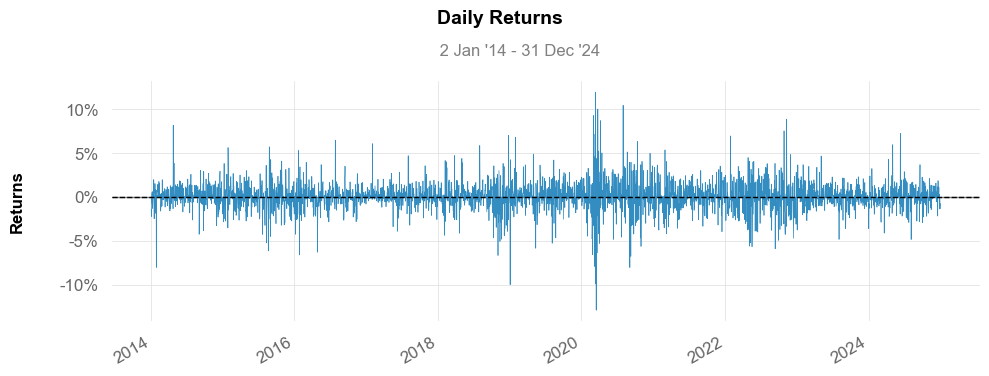




MSFT Daily Returns Plot:



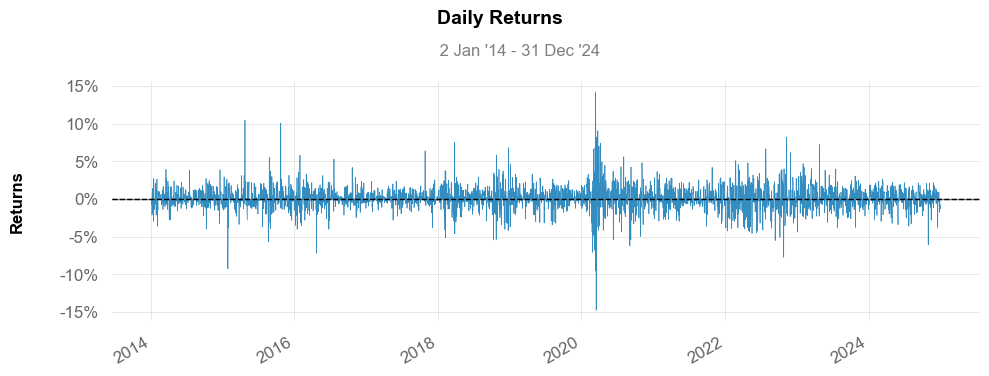




NVDA Daily Returns Plot:



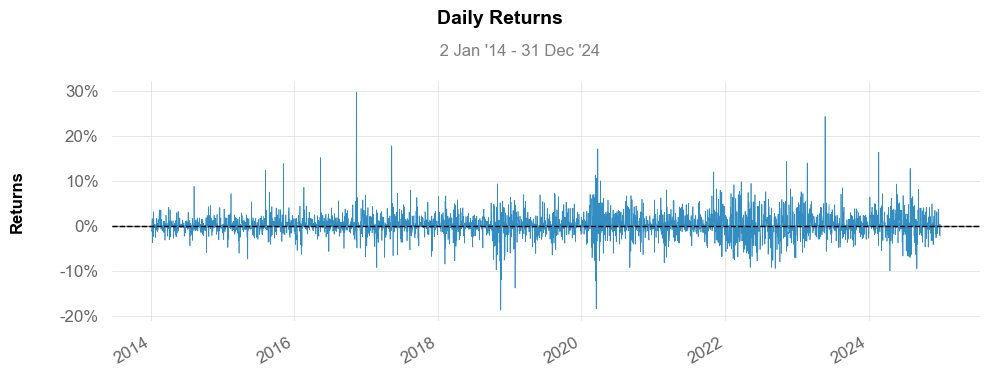




AMZN Daily Returns Plot:



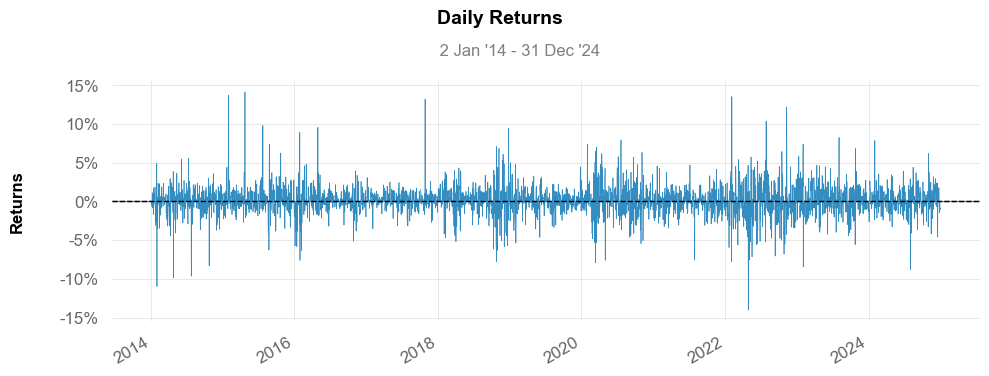




GOOG Daily Returns Plot:



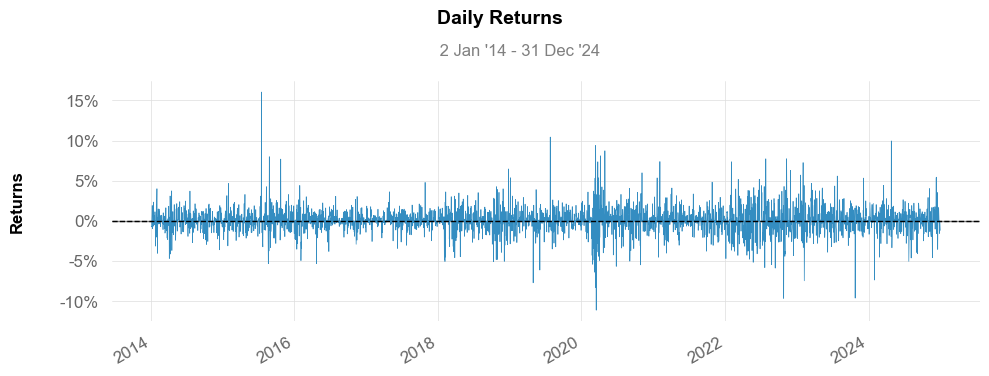




META Daily Returns Plot:



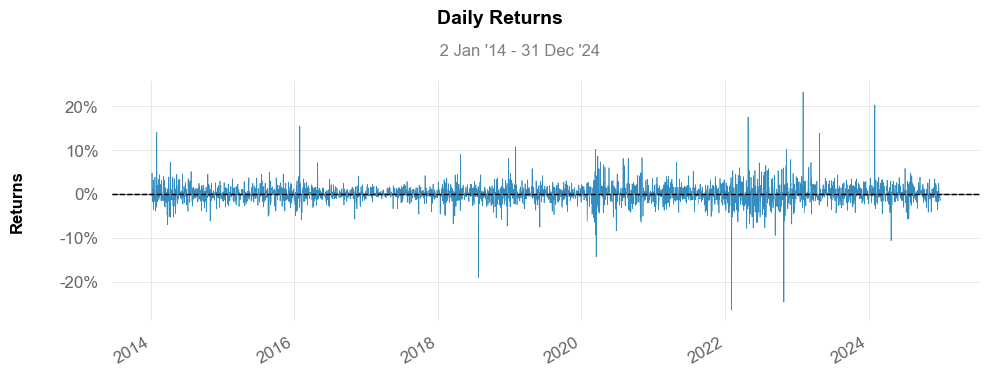




TSLA Daily Returns Plot:



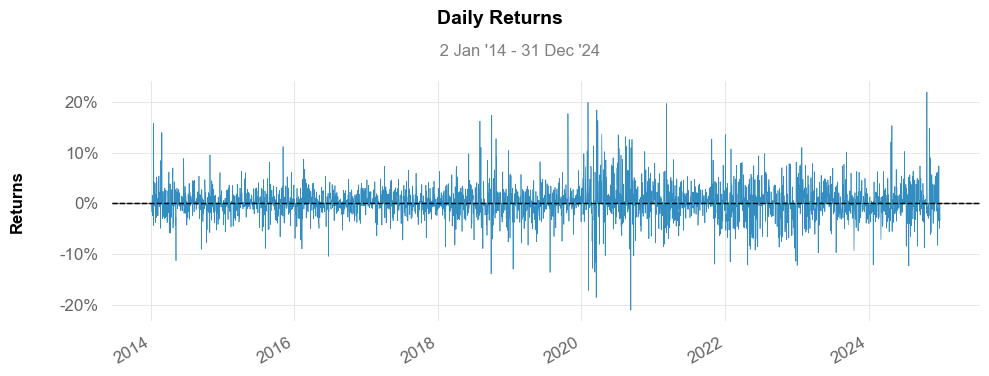

In [268]:
# Plotting Daily Returns for each stock
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]

for symbol in list_stocks: 
    print(f'\n{symbol.columns[0]} Daily Returns Plot:\n')
    qs.plots.daily_returns(symbol, benchmark=None)
    print('\n')

### Plot the *Cumulative Returns* chart for each of them using Quantstats 


AAPL Cumulative Retures Plot:


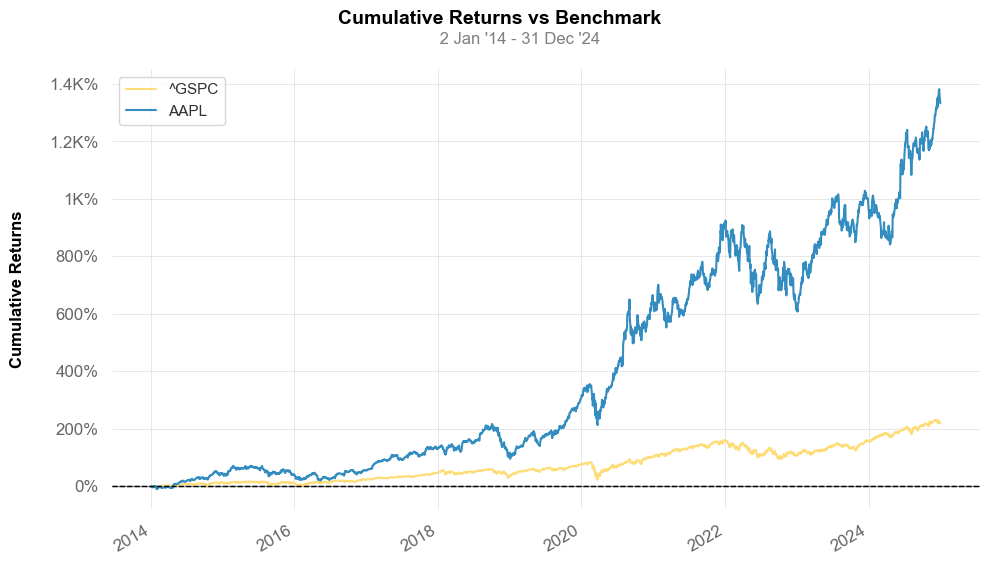




MSFT Cumulative Retures Plot:


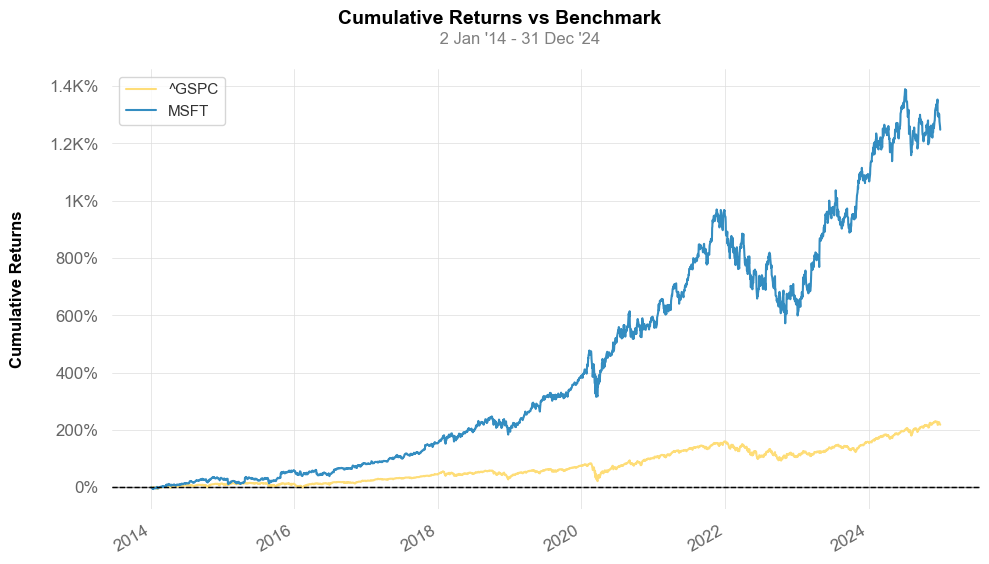




NVDA Cumulative Retures Plot:


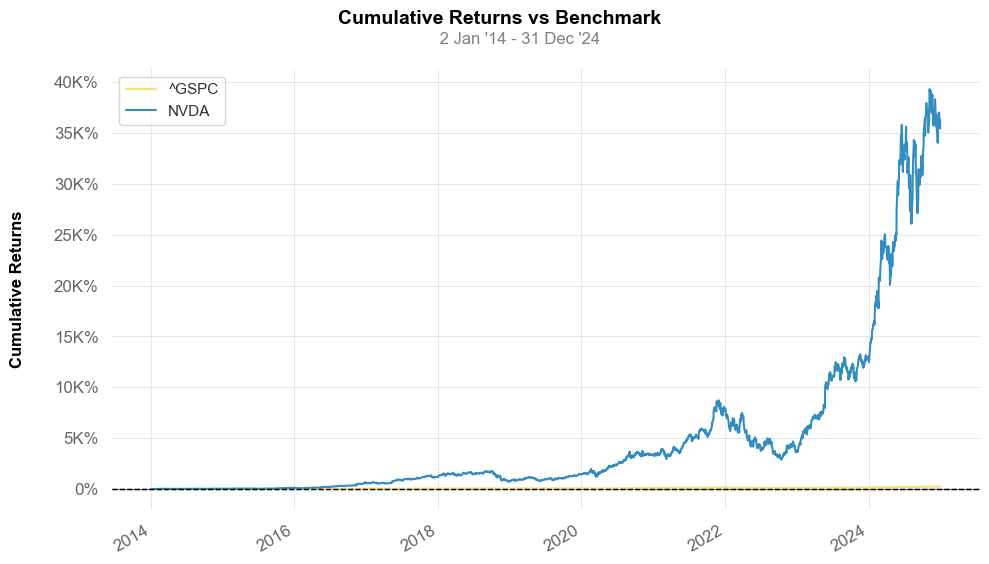




AMZN Cumulative Retures Plot:


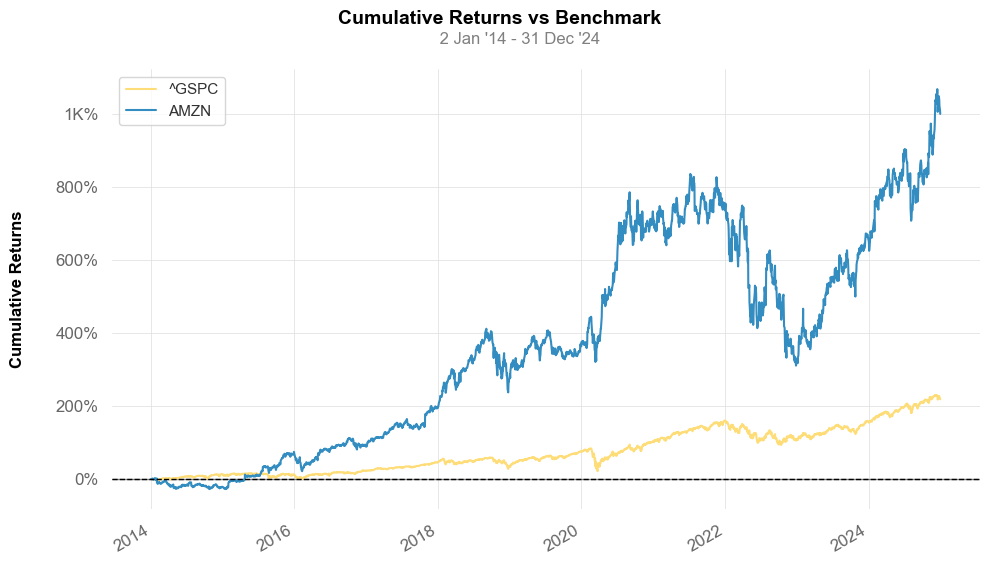




GOOG Cumulative Retures Plot:


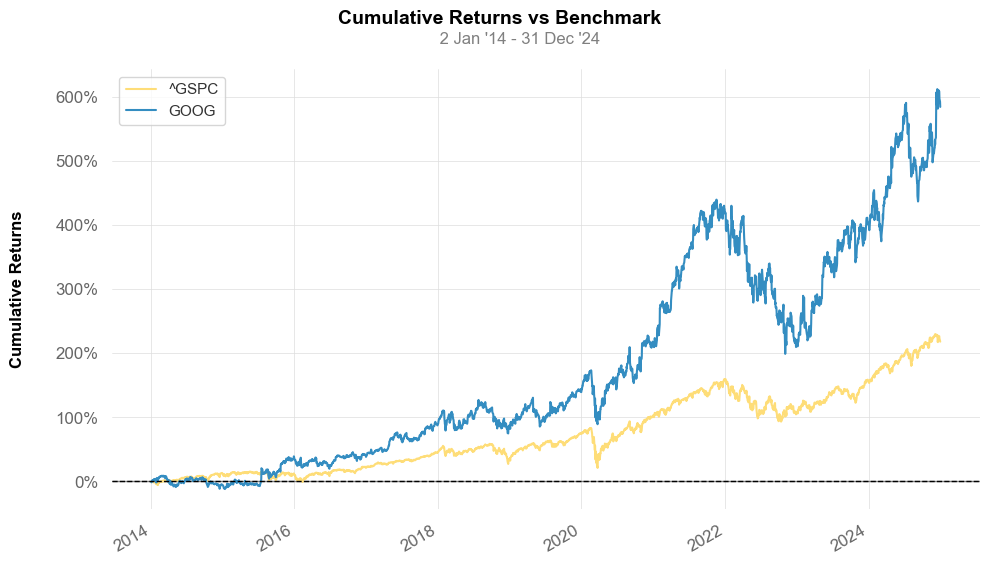




META Cumulative Retures Plot:


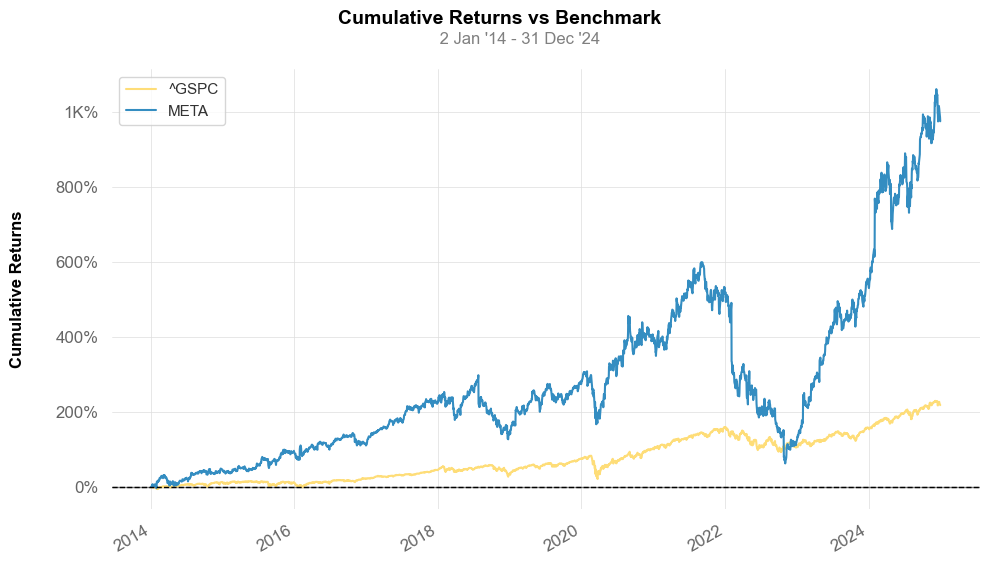




TSLA Cumulative Retures Plot:


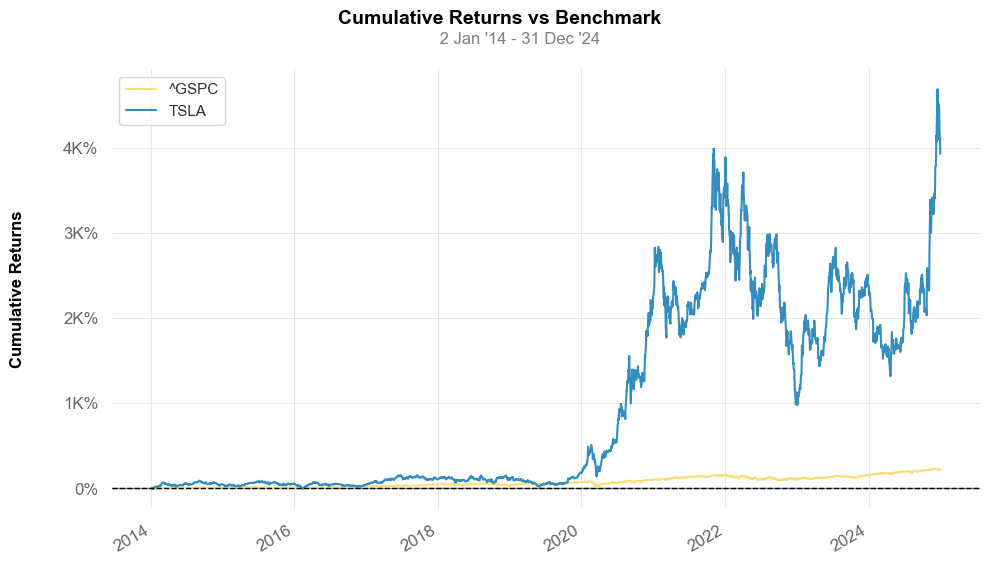

In [270]:
# Plotting Cumulative Returns for each stock
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]

for symbol in list_stocks: 
    print(f'\n{symbol.columns[0]} Cumulative Retures Plot:')
    qs.plots.returns(symbol, benchmark=sp500)
    print('\n')

### Histograms for daily returns 


AAPL Daily Returns Histogram


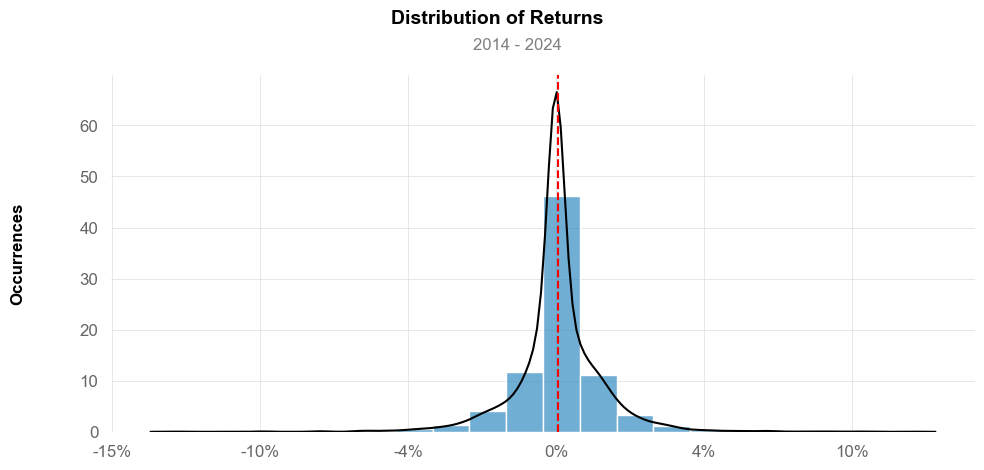




MSFT Daily Returns Histogram


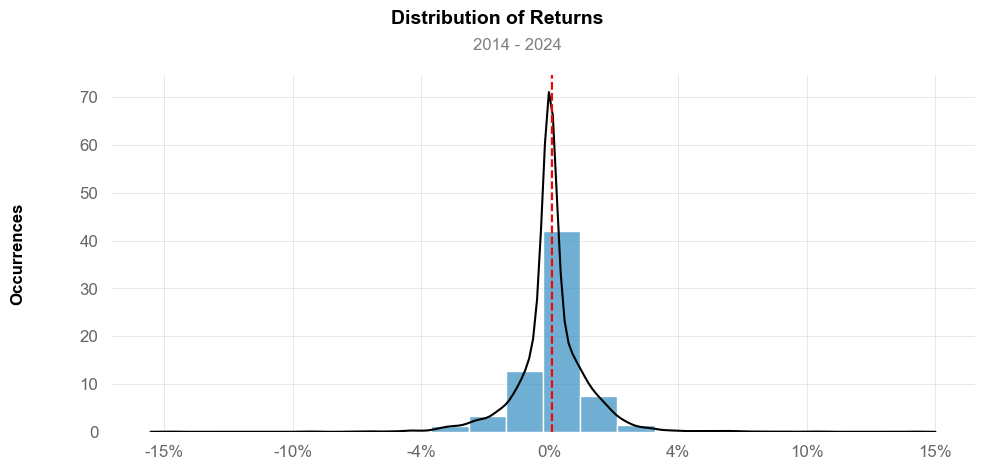




NVDA Daily Returns Histogram


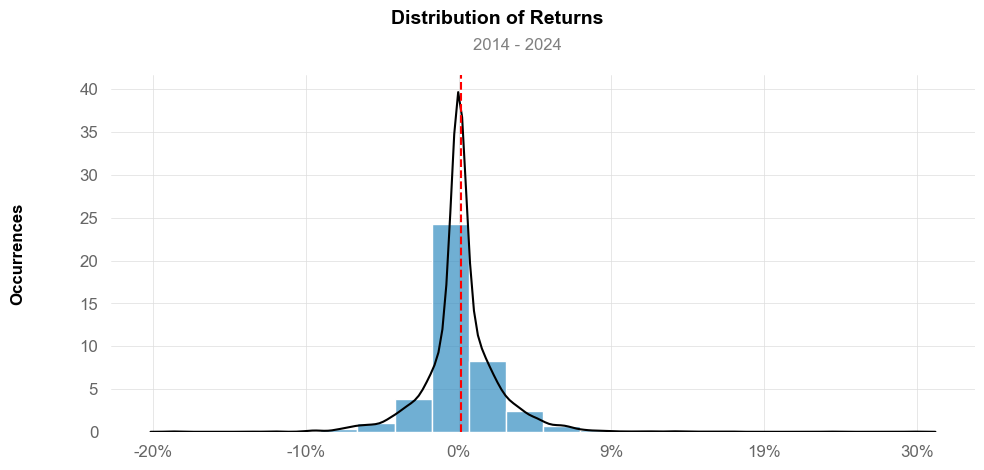




AMZN Daily Returns Histogram


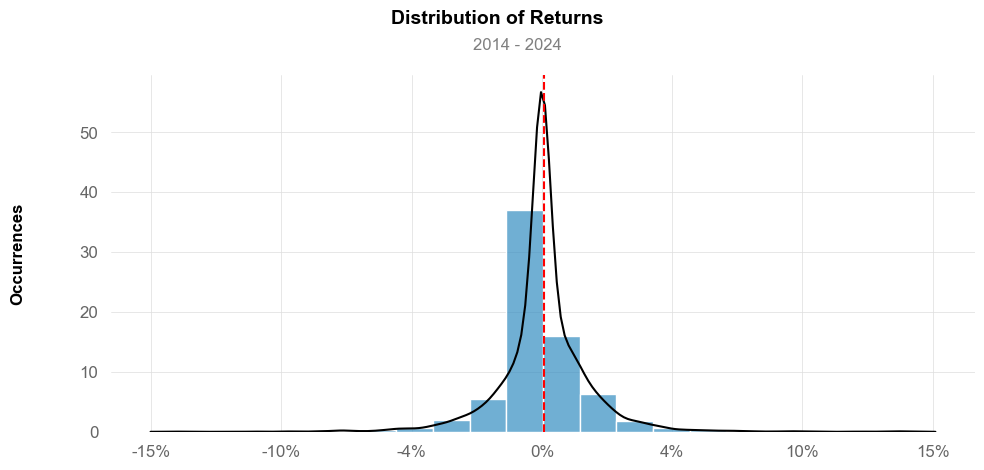




GOOG Daily Returns Histogram


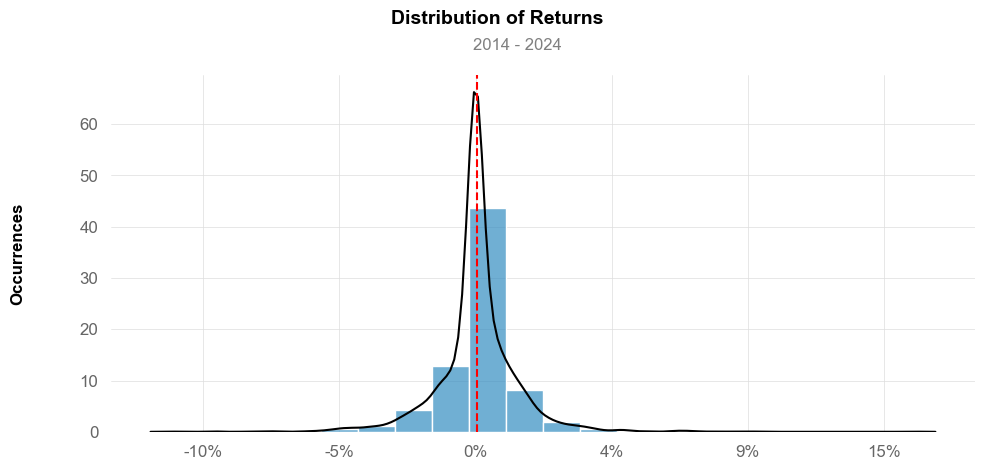




META Daily Returns Histogram


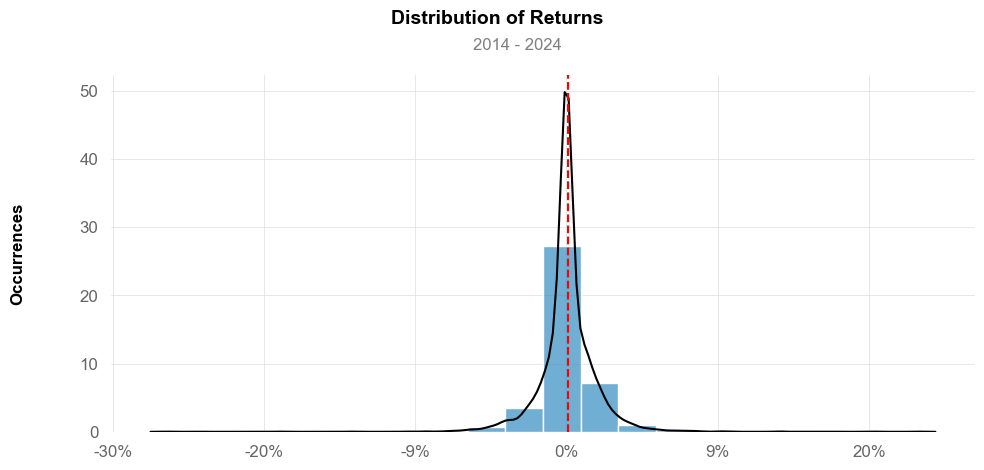




TSLA Daily Returns Histogram


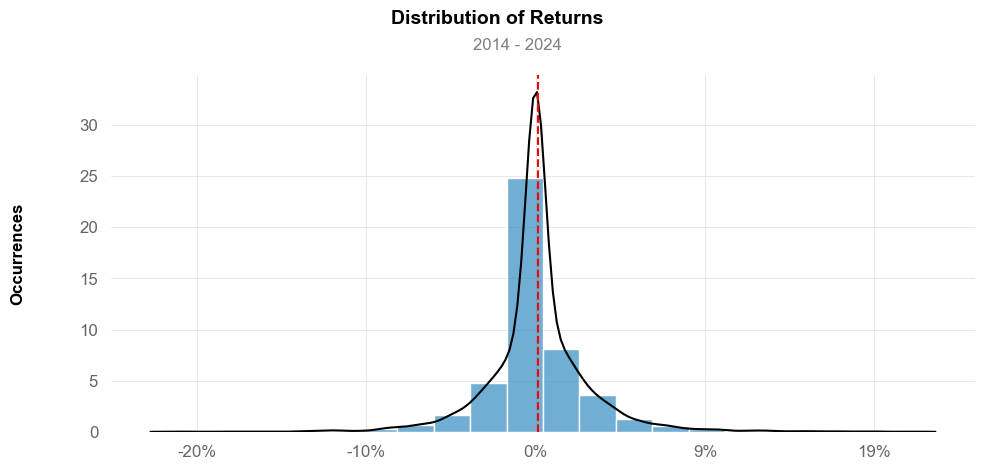

In [272]:
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]

for symbol in list_stocks: 
    print(f'\n{symbol.columns[0]} Daily Returns Histogram')
    qs.plots.histogram(symbol, resample='D')
    print('\n')

Histograms ของ daily returns ในการวิเคราะห์ผลตอบแทนรายวันของสินทรัพย์ ช่วยให้เข้าใจลักษณะของผลตอบแทน และความเสี่ยง (volatility) ของสินทรัพย์ได้ดียิ่งขึ้น ในหลายแง่มุม:

1. การวิเคราะห์ความผันผวน (Volatility) : Histograms แสดงการกระจายตัวของผลตอบแทนรายวัน ซึ่งช่วยให้มองเห็นว่า ผลตอบแทนของสินทรัพย์มีการเปลี่ยนแปลงมากหรือน้อยในแต่ละวัน โดยสามารถดูได้จาก ความกว้างของกราฟ หากกราฟกระจายกว้างแสดงว่า สินทรัพย์นั้นมีความผันผวนสูง หรือความเสี่ยงสูง (volatility มาก) หากกราฟมีการกระจายตัวที่แคบแสดงว่า ความผันผวนต่ำ หรือความเสี่ยงต่ำ

2. การวิเคราะห์การกระจายของผลตอบแทน : การใช้ histogram จะช่วยให้เห็นรูปแบบการกระจาย (distribution) ของผลตอบแทนรายวัน ซึ่งอาจมีรูปแบบที่ สมมาตร (normal) หรือเบี่ยงเบน (skewed)
    - Normal Distribution: มีการกระจายแบบปกติ (bell-shaped curve) แสดงว่าผลตอบแทนมีความคาดการณ์ได้ และสามารถคำนวณความเสี่ยงได้ง่าย
    - Skewed Distribution: มีการกระจายไม่เป็นปกติ (มีการเบี่ยงเบนไปทางขวาหรือซ้าย) อาจบ่งชี้ถึงความเสี่ยงที่ไม่สมดุล หรือผลตอบแทนที่คาดการณ์ได้ยาก

3. การดูขอบเขตของผลตอบแทน (Range): Histogram ช่วยให้มองเห็นผลตอบแทนในแต่ละวันอยู่ในช่วงไหน โดยการดูจำนวนครั้งที่ผลตอบแทนตกอยู่ในช่วงต่างๆ ซึ่งจะช่วยให้เห็นว่าสินทรัพย์มีช่วงผลตอบแทนที่กว้างหรือต่ำ เช่น ผลตอบแทนอาจจะอยู่ในช่วง +2% ถึง -2% โดยมาก หรืออาจมีความผันผวนกว้างกว่านั้น

### Kurtosis

- ค่า Kurtosis ใช้วัด “ความแหลม” หรือ “ความโค้ง” ของการกระจายของข้อมูล โดยเทียบกับการกระจายแบบปกติ (Normal Distribution)
- Kurtosis = 3 → การแจกแจงแบบปกติ (Normal Distribution)
- Kurtosis > 3 → Fat tails → โอกาสเจอ extreme gains/losses สูง
- Kurtosis < 3 → Distribution แบน → Extreme movements เกิดยาก

In [275]:
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]

for symbol in list_stocks: 
    print(f'{symbol.columns[0]} kurtosis: {qs.stats.kurtosis(symbol).round(2)}')
    print('\n')

AAPL kurtosis: Ticker
AAPL    5.57
dtype: float64


MSFT kurtosis: Ticker
MSFT    7.91
dtype: float64


NVDA kurtosis: Ticker
NVDA    8.87
dtype: float64


AMZN kurtosis: Ticker
AMZN    6.31
dtype: float64


GOOG kurtosis: Ticker
GOOG    6.71
dtype: float64


META kurtosis: Ticker
META    20.7
dtype: float64


TSLA kurtosis: Ticker
TSLA    4.46
dtype: float64




### Standard Deviation
Standard Deviation (SD) ค่าที่ใช้วัด ความผันผวน (volatility) ของข้อมูลจากค่าเฉลี่ย ยิ่ง SD สูง แสดงว่าค่าข้อมูลกระจัดกระจายจากค่าเฉลี่ยมาก โดยส่วนใหญ่ หุ้นที่ SD 15% ต่อปี ถือว่าผันผวนระดับกลาง หุ้นที่ SD 30-50% ถือว่าผันผวนสูง แต่กองทุนดัชนีใหญ่ๆ (เช่น S&P500) มักมี SD อยู่ราว ๆ 15-20%

🔽 SD ต่ำ : ผลตอบแทนแกว่งน้อย → ความเสี่ยงต่ำ 

🔼 SD สูง : ผลตอบแทนแกว่งมาก → ความเสี่ยงสูง

In [277]:
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]

for symbol in list_stocks:
    ticker = symbol.columns[0]

    # Daily SD
    daily_std = symbol.std().values[0]

    # Monthly SD
    monthly_returns = symbol.resample('M').sum()
    monthly_std = monthly_returns.std().values[0]

    # Annual SD
    annual_returns = symbol.resample('Y').sum()
    annual_std = annual_returns.std().values[0]

    print(f"{ticker} Standard Deviation from 2014 to 2024:")
    print(f"  - Daily   : {daily_std:.3f}")
    print(f"  - Monthly : {monthly_std:.3f}")
    print(f"  - Yearly  : {annual_std:.3f}")
    print()

AAPL Standard Deviation from 2014 to 2024:
  - Daily   : 0.018
  - Monthly : 0.077
  - Yearly  : 0.290

MSFT Standard Deviation from 2014 to 2024:
  - Daily   : 0.017
  - Monthly : 0.059
  - Yearly  : 0.219

NVDA Standard Deviation from 2014 to 2024:
  - Daily   : 0.030
  - Monthly : 0.127
  - Yearly  : 0.596

AMZN Standard Deviation from 2014 to 2024:
  - Daily   : 0.021
  - Monthly : 0.085
  - Yearly  : 0.404

GOOG Standard Deviation from 2014 to 2024:
  - Daily   : 0.018
  - Monthly : 0.066
  - Yearly  : 0.283

META Standard Deviation from 2014 to 2024:
  - Daily   : 0.024
  - Monthly : 0.093
  - Yearly  : 0.491

TSLA Standard Deviation from 2014 to 2024:
  - Daily   : 0.036
  - Monthly : 0.164
  - Yearly  : 0.812



### Pairplots and Correlation Matrix

Correlation (ความสัมพันธ์ระหว่างหุ้น) เป็นเครื่องมือในการวางกลยุทธ์ลงทุน โดยเฉพาะกลยุทธ์ที่เรียกว่า Long-Short Strategy ซึ่งนักลงทุนจะซื้อหุ้นหนึ่ง (Long) และขายหุ้นอีกตัวหนึ่ง (Short) โดยเชื่อว่าหุ้นทั้งสองจะเคลื่อนไหวในทิศทางตรงกันข้าม หากตัวหนึ่งขึ้น อีกตัวหนึ่งจะลง

นอกจากใช้ในกลยุทธ์ Long-Short แล้ว การวิเคราะห์ Correlation ยังช่วยลด Systemic Risk (ความเสี่ยง) เช่น หากพอร์ตลงทุนมีหุ้นที่มีความสัมพันธ์สูงกันมาก หรืออยู่ในอุตสาหกรรมเดียวกันทั้งหมด หากเกิดเหตุการณ์ลบในอุตสาหกรรมนั้น อาจทำให้หุ้นทุกตัวในพอร์ตตกพร้อมกันและสร้างความเสียหายหนักได้ Correlation ช่วยให้นักลงทุนสามารถกระจายความเสี่ยง

การดูความสัมพันธ์ระหว่างสินทรัพย์คือ Pairplot และ Correlation Matrix โดยค่าใน Correlation Matrix จะอยู่ระหว่าง -1 ถึง 1

- ค่า -1 หมายถึงมีความสัมพันธ์เชิงลบอย่างสมบูรณ์ (เคลื่อนไหวสวนทางกัน)
- ค่า 1 หมายถึงมีความสัมพันธ์เชิงบวกอย่างสมบูรณ์ (เคลื่อนไหวไปในทิศทางเดียวกัน)
- ค่าใกล้ 0 แปลว่าความสัมพันธ์ต่ำ


In [279]:
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla]

merged_df = pd.concat(list_stocks, join='outer', axis=1)
merged_df

Ticker,AAPL,MSFT,NVDA,AMZN,GOOG,META,TSLA
Date,,,,,,,
2014-01-02,-0.014064,-0.006682,-0.009987,-0.002056,-0.006772,0.001098,-0.002194
2014-01-03,-0.021966,-0.006728,-0.011980,-0.003845,-0.007295,-0.002742,-0.003598
2014-01-06,0.005453,-0.021132,0.013401,-0.007088,0.011149,0.048387,-0.017117
2014-01-07,-0.007152,0.007750,0.016373,0.011178,0.019278,0.012587,0.016054
2014-01-08,0.006333,-0.017852,0.013630,0.009773,0.002081,0.005352,0.012855
...,...,...,...,...,...,...,...
2024-12-24,0.011478,0.009374,0.003938,0.017729,0.008062,0.013170,0.073572
2024-12-26,0.003176,-0.002777,-0.002068,-0.008732,-0.002379,-0.007240,-0.017630
2024-12-27,-0.013242,-0.017302,-0.020868,-0.014534,-0.015525,-0.005867,-0.049479


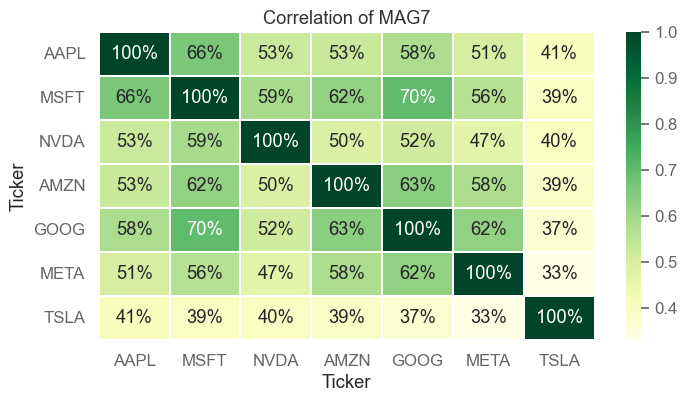

In [280]:
# Correlation Matrix
plt.figure(figsize=(8,4))
sns.heatmap(data=merged_df.corr(numeric_only=True), cmap='YlGn', annot=True, linewidths=.2, fmt='.0%')
plt.title('Correlation of MAG7')
plt.show()

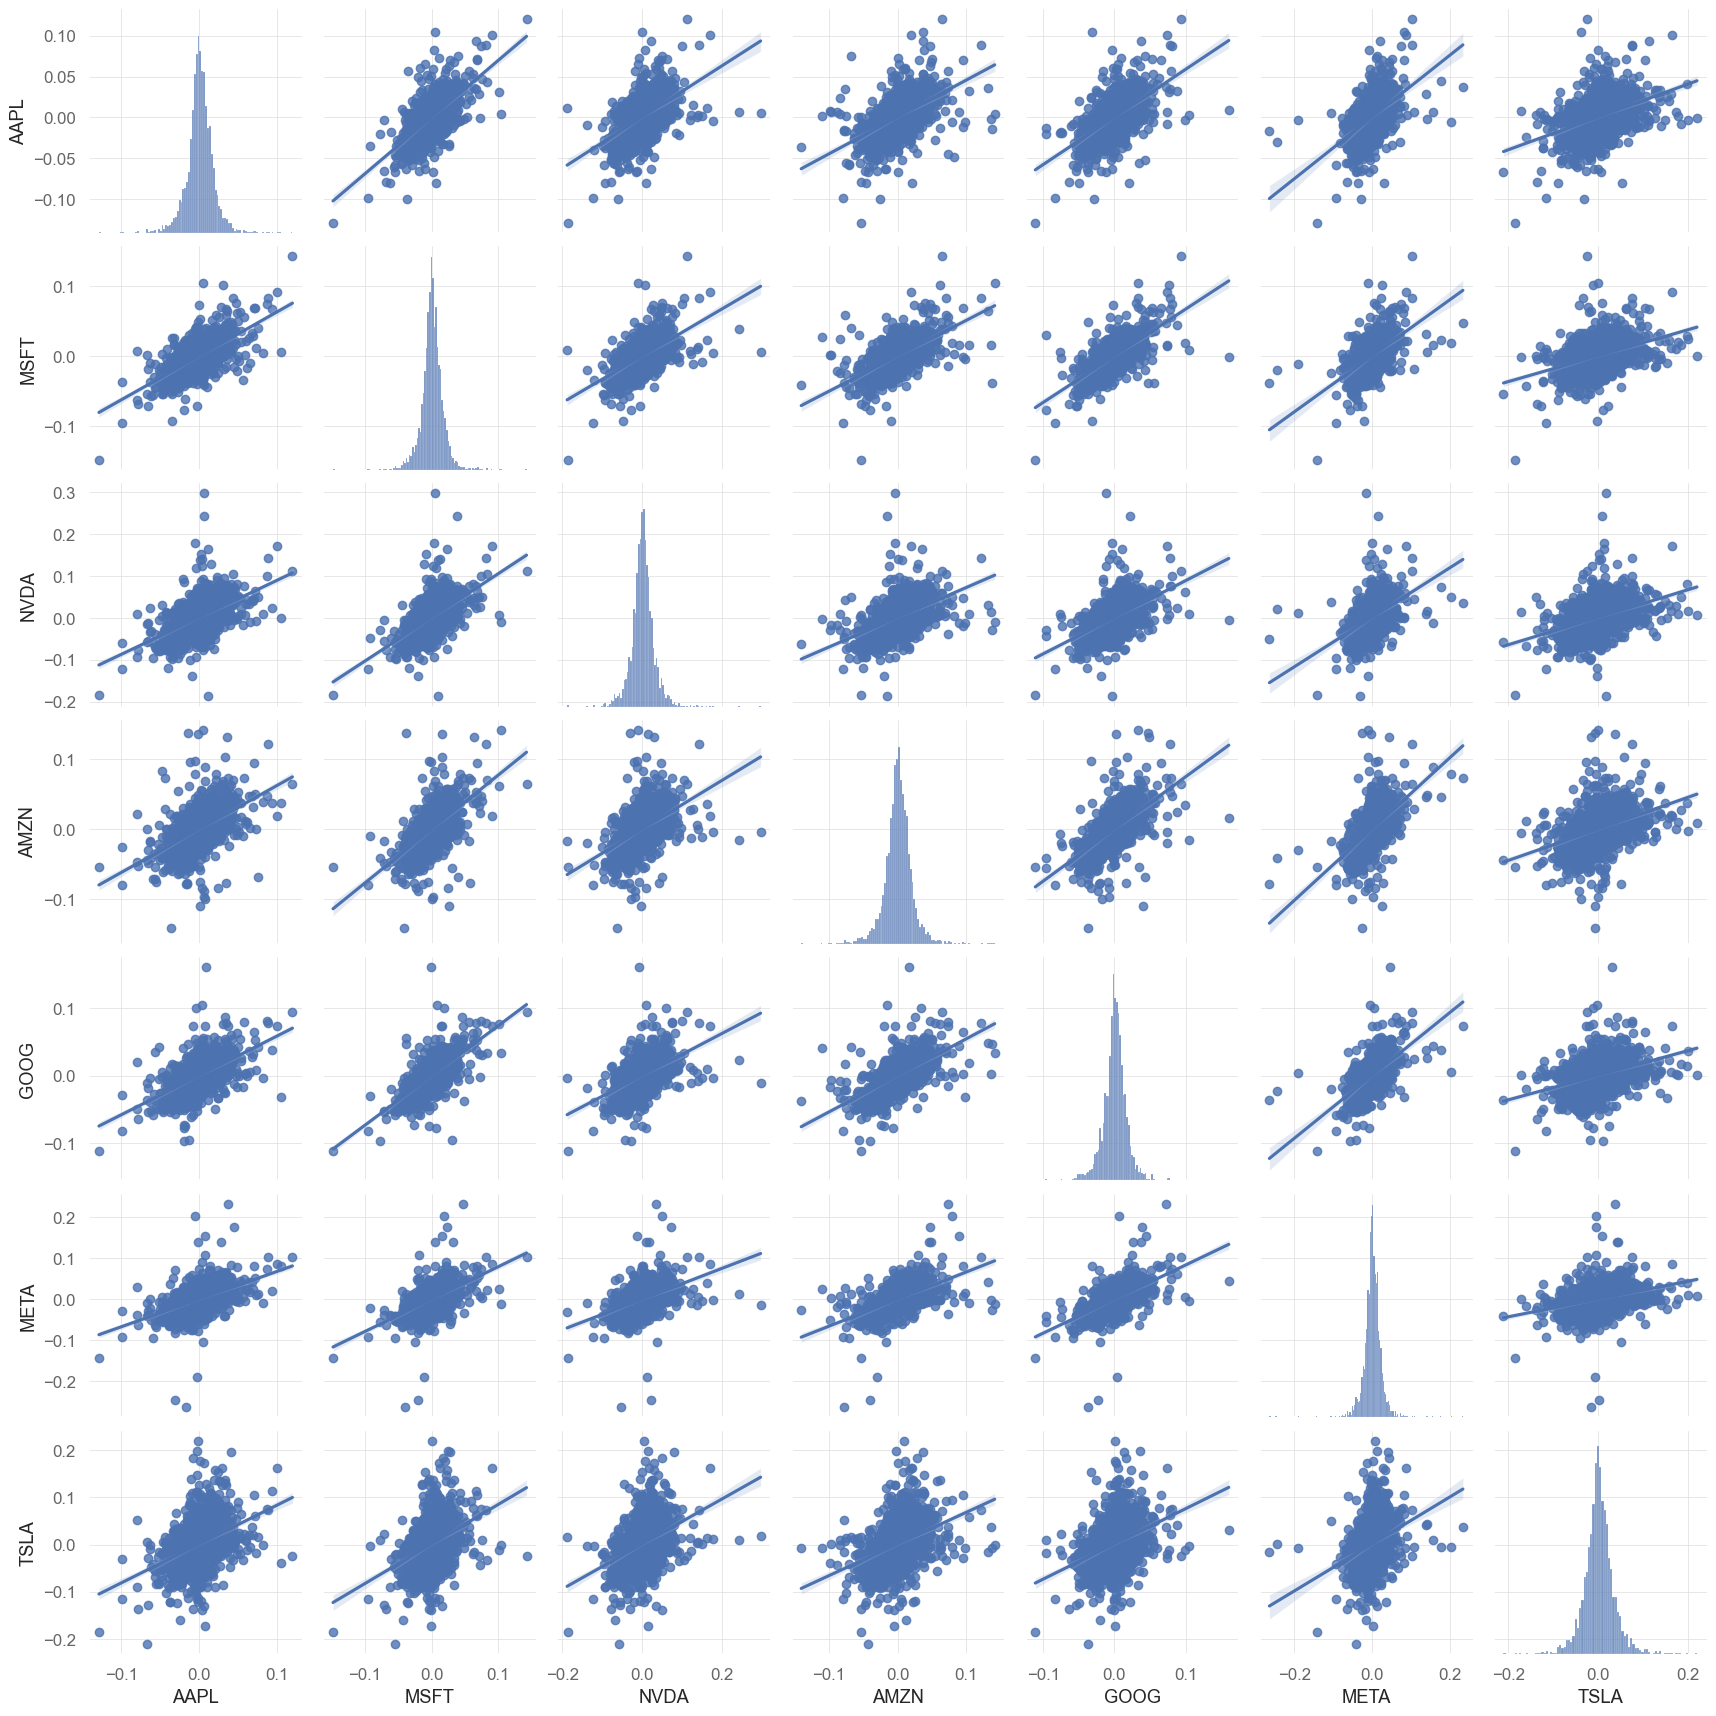

In [281]:
# Pairplots
sns.pairplot(data=merged_df, kind='reg')
plt.show()

### Beta and Alpha

Beta และ Alpha เป็นตัวชี้วัดที่ประเมินผลงานของหุ้นเมื่อเทียบกับตลาดโดยรวม(S&P500) เบต้าเป็นตัวชี้วัดความผันผวนของหุ้นเมื่อเทียบกับตลาด ค่าเบต้า 1 หมายความว่าหุ้นมีความผันผวนเท่ากับตลาด ค่าเบต้าที่มากกว่า 1 แสดงว่าหุ้นมีความผันผวนมากกว่าตลาด และค่าเบต้าที่น้อยกว่า 1 แสดงว่าหุ้นมีความผันผวนน้อยกว่า

Alpha เป็นการวัดผลตอบแทนส่วนเกินของหุ้นเมื่อเทียบกับผลงานที่คาดหวังตามค่าเบต้า อัลฟ่าที่เป็นบวกบ่งชี้ว่าหุ้นมีผลงานดีกว่าที่คาดหวังตามค่าเบต้า ในขณะที่อัลฟ่าที่เป็นลบบ่งชี้ว่าผลงานต่ำกว่ามาตรฐาน การวิเคราะห์ค่าเบต้าและอัลฟ่าของหุ้นจะช่วยให้นักลงทุนเข้าใจความเสี่ยงและผลตอบแทนที่คาดว่าจะได้รับของหุ้นเมื่อเทียบกับตลาดได้ดีขึ้น

In [283]:
# load data on the SP500
start_date = '2014-01-01'
end_date = '2024-12-31'

sp500 = qs.utils.download_returns('^GSPC') # ^GSPC คือชื่อดัชนี S&P 500 บน Yahoo Finance
sp500 = sp500.loc[start_date:end_date]

if sp500.index.tz is not None:
    sp500.index = sp500.index.tz_convert(None)

print('✅ Getting info for stocks complete!')
sp500

[*********************100%***********************]  1 of 1 completed

✅ Getting info for stocks complete!


Ticker,^GSPC
Date,
2014-01-02,-0.008862
2014-01-03,-0.000333
2014-01-06,-0.002512
2014-01-07,0.006082
2014-01-08,-0.000212
...,...
2024-12-24,0.011043
2024-12-26,-0.000406
2024-12-27,-0.011056


In [284]:
# Removeing Index 
sp500_no_index = sp500.reset_index(drop=True)
aapl_no_index = aapl.reset_index(drop=True)
msft_no_index = msft.reset_index(drop=True)
nvda_no_index = nvda.reset_index(drop=True)
amzn_no_index = amzn.reset_index(drop=True)
goog_no_index = goog.reset_index(drop=True)
meta_no_index = meta.reset_index(drop=True)
tsla_no_index = tsla.reset_index(drop=True)

# Daily returns without index
stocks_no_index = [sp500_no_index, aapl_no_index,
                  msft_no_index, nvda_no_index,
                  amzn_no_index, goog_no_index, 
                  meta_no_index, tsla_no_index]

# Display daily returns
for i, stock in enumerate(stocks_no_index):
    print(f'Daily returns for stock {i+1} without index:')
    print(stock)
    print('*' * 60)

Daily returns for stock 1 without index:
Ticker     ^GSPC
0      -0.008862
1      -0.000333
2      -0.002512
3       0.006082
4      -0.000212
...          ...
2763    0.011043
2764   -0.000406
2765   -0.011056
2766   -0.010702
2767   -0.004285

[2768 rows x 1 columns]
************************************************************
Daily returns for stock 2 without index:
Ticker      AAPL
0      -0.014064
1      -0.021966
2       0.005453
3      -0.007152
4       0.006333
...          ...
2763    0.011478
2764    0.003176
2765   -0.013242
2766   -0.013263
2767   -0.007058

[2768 rows x 1 columns]
************************************************************
Daily returns for stock 3 without index:
Ticker      MSFT
0      -0.006682
1      -0.006728
2      -0.021132
3       0.007750
4      -0.017852
...          ...
2763    0.009374
2764   -0.002777
2765   -0.017302
2766   -0.013240
2767   -0.007838

[2768 rows x 1 columns]
************************************************************
Daily r


Beta for AAPL : 1.179
Alpha for AAPL : 0.001


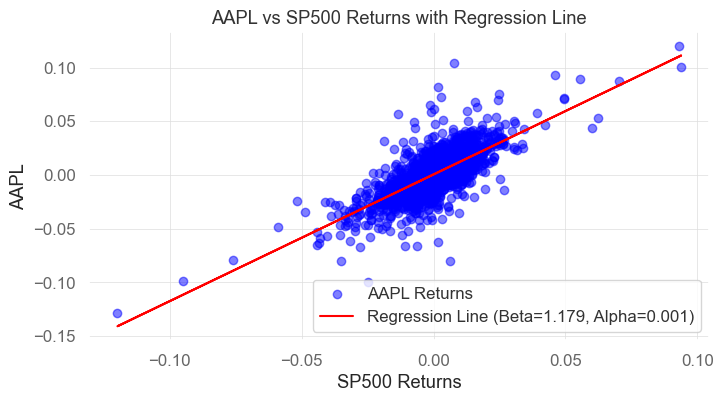


Beta for MSFT : 1.205
Alpha for MSFT : 0.001


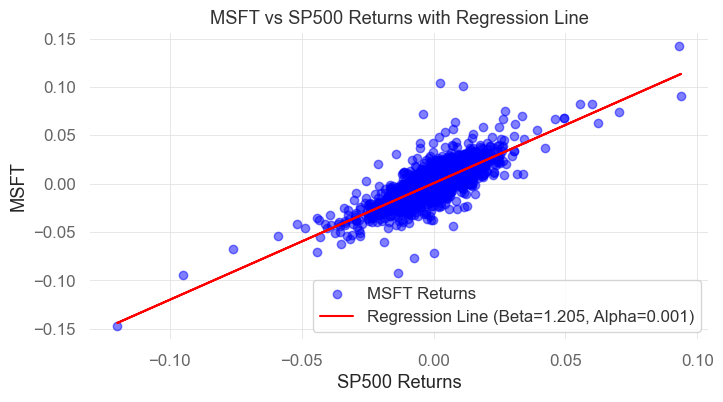


Beta for NVDA : 1.716
Alpha for NVDA : 0.002


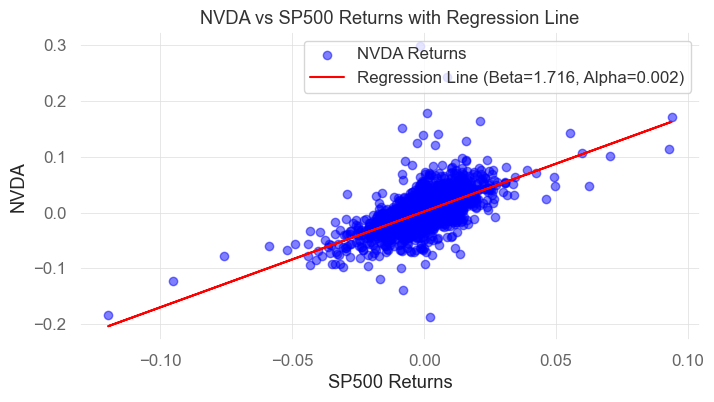


Beta for AMZN : 1.161
Alpha for AMZN : 0.001


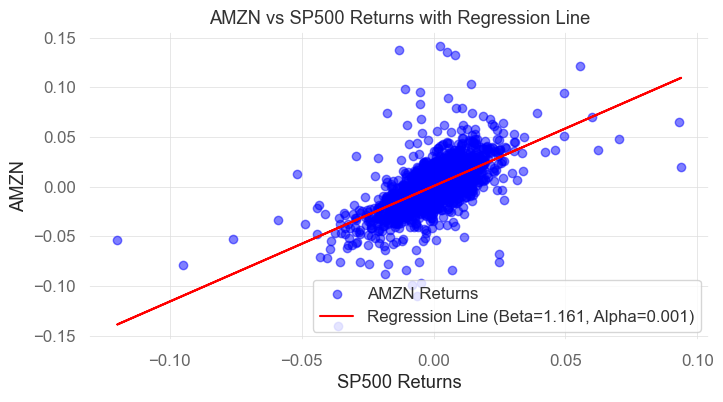


Beta for GOOG : 1.151
Alpha for GOOG : 0.000


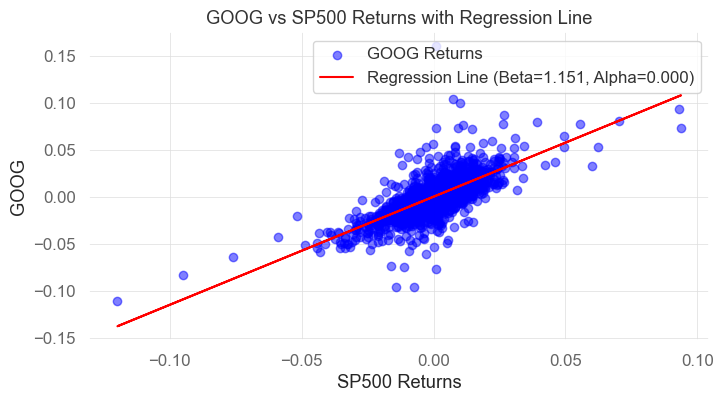


Beta for META : 1.292
Alpha for META : 0.001


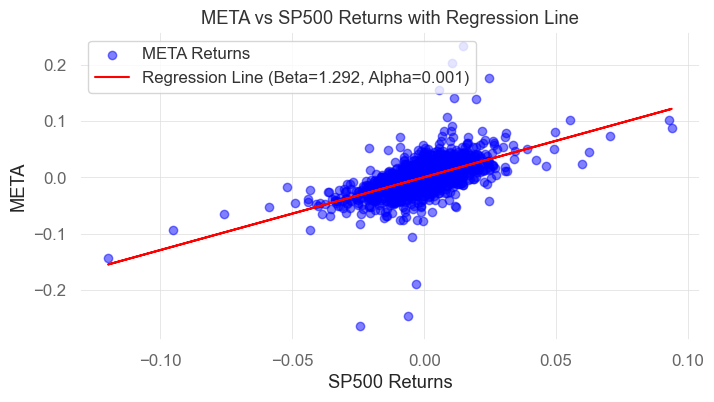


Beta for TSLA : 1.507
Alpha for TSLA : 0.001


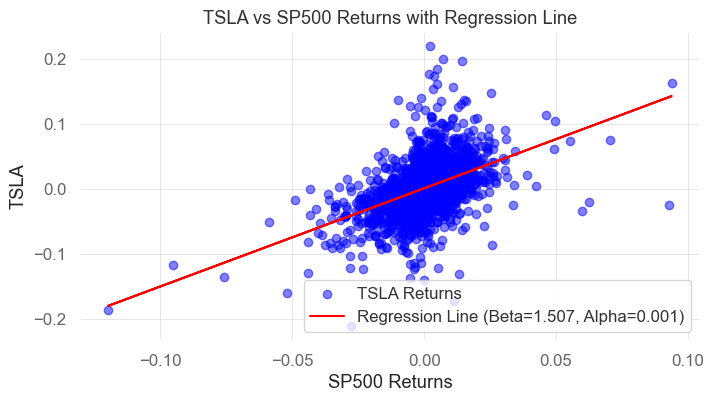

In [285]:
from sklearn.linear_model import LinearRegression

stocks_no_index = [aapl_no_index, msft_no_index, nvda_no_index,
                  amzn_no_index, goog_no_index, meta_no_index, tsla_no_index]

for no_index in stocks_no_index: 
    X = sp500_no_index.values.reshape(-1,1)
    y = no_index.values.reshape(-1,1)
    model_linear = LinearRegression().fit(X,y)
    y_pred = model_linear.predict(X)
    
    beta = model_linear.coef_[0][0]
    alpha = model_linear.intercept_[0]
    
    print()
    print(f'Beta for {no_index.columns[0]} : {beta:.3f}')
    print(f'Alpha for {no_index.columns[0]} : {alpha:.3f}')

    plt.figure(figsize=(8, 4))
    plt.scatter(X, y, color='blue', label=f'{no_index.columns[0]} Returns', alpha=0.5)
    plt.plot(X, y_pred, color='red', label=f'Regression Line (Beta={beta:.3f}, Alpha={alpha:.3f})') # Plot Regression Line
    plt.title(f'{no_index.columns[0]} vs SP500 Returns with Regression Line')
    plt.xlabel('SP500 Returns')
    plt.ylabel(f'{no_index.columns[0]}')
    plt.legend()
    plt.show()

### Sharpe Ratio
- Sharpe Ratio มาตรวัดความเสี่ยงที่ช่วยประเมินผลตอบแทนที่ได้รับ ต่อ ความเสี่ยง ของการลงทุน โดยคำนวณจากความแตกต่างระหว่าง ผลตอบแทนของการลงทุน และ ผลตอบแทนไร้ความเสี่ยง (Risk-free rate) ซึ่งมักจะใช้ผลตอบแทนจากพันธบัตรรัฐบาลเป็นเกณฑ์เปรียบเทียบ และหารด้วย ส่วนเบี่ยงเบนมาตรฐาน (Standard deviation) ของผลตอบแทนการลงทุน เพื่อวัดความผันผวน
- Sharpe Ratio > 1 : พอร์ตการลงทุนให้ผลตอบแทนที่คุ้มค่ากับความเสี่ยงที่รับได้
- Sharpe Ratio > 2 : ผลตอบแทนที่ได้จากการลงทุนสูงกว่าความเสี่ยงที่รับ
- Sharpe Ratio > 3 : ถือเป็นการลงทุนที่มีความเสี่ยงต่ำและให้ผลตอบแทนที่ดี
- Sharpe Ratio < 1 : หมายความว่าผลตอบแทนของพอร์ตการลงทุนไม่คุ้มกับความเสี่ยงที่รับ
- Sharpe Ratio = 0 : ผลตอบแทนที่ได้จากการลงทุนเท่ากับผลตอบแทนไร้ความเสี่ยง

In [287]:
list_stocks_all = [sp500, aapl, msft, nvda, amzn, goog, meta, tsla]
    
for symbol in list_stocks_all:
        name = symbol.columns[0]
        sharpe = qs.stats.sharpe(symbol).round(2)
        print(f'Sharpe Ratio for {name}: {sharpe}\n')

Sharpe Ratio for ^GSPC: Ticker
^GSPC    0.7
dtype: float64

Sharpe Ratio for AAPL: Ticker
AAPL    1.01
dtype: float64

Sharpe Ratio for MSFT: Ticker
MSFT    1.03
dtype: float64

Sharpe Ratio for NVDA: Ticker
NVDA    1.37
dtype: float64

Sharpe Ratio for AMZN: Ticker
AMZN    0.83
dtype: float64

Sharpe Ratio for GOOG: Ticker
GOOG    0.77
dtype: float64

Sharpe Ratio for META: Ticker
META    0.77
dtype: float64

Sharpe Ratio for TSLA: Ticker
TSLA    0.88
dtype: float64



## Initial Conclusions

1. Sharpe Ratio – วัดประสิทธิภาพของผลตอบแทนเทียบกับความเสี่ยง
    - หุ้น NVDA มี Sharpe Ratio สูงสุด สะท้อนว่าให้ผลตอบแทนดีมากเมื่อเทียบกับความเสี่ยง ส่วน AAPL และ MSFT คุ้มความเสี่ยง และ S&P500 มี Sharpe เพียง 0.7 ถือเป็น baseline ที่หุ้นอื่นควรทำให้ดีกว่า
---
2. Beta – ความผันผวนเทียบกับตลาด (Beta > 1 = ผันผวนมากกว่าตลาด / < 1 = ผันผวนน้อยกว่า)
    - NVDA และ TSLA มี Beta สูงเกิน 1.5 นักลงทุนต้องรับความเสี่ยงสูง เพื่อแลกกับโอกาสผลตอบแทนสูง ส่วน AAPL, MSFT, AMZN มี Beta ใกล้เคียงกัน แสดงถึงเสถียรภาพพอสมควร
---
3. Alpha – ผลตอบแทนส่วนเกินเมื่อเทียบกับความเสี่ยง (ยิ่งสูงยิ่งดี แสดงว่าหุ้นให้ผลตอบแทน “มากกว่าที่คาด” จากระดับความเสี่ยง)
    - ทุกตัวให้ Alpha เป็นบวกหรือศูนย์ แสดงว่าไม่มีหุ้นไหน underperform
    - NVDA มี Alpha สูงสุด 0.002 ช่วยเสริมให้เห็นว่า NVDA เป็นตัวเต็งในเชิง “ผลตอบแทนต่อความเสี่ยง”
---
4. Standard Deviation – วัดความผันผวน (ความเสี่ยงรวม)
    - TSLA และ NVDA มีความผันผวนสูงสุด ทั้งในระดับวัน/เดือน/ปี → นักลงทุนจะต้องรับแรงเหวี่ยงสูง
    - MSFT ต่ำสุดในเกือบทุกช่วง → เป็นหุ้นที่ “นิ่ง” และมั่นคง
    - GOOG และ AAPL อยู่ในระดับกลาง — อาจเหมาะกับผู้ที่ต้องการความสมดุล

---
#### แนวทางสำหรับนักลงทุน
1. เลือกหุ้นตามความเสี่ยงที่รับได้
    - Conservative : MSFT, AAPL, GOOG	Beta ต่ำ, ความผันผวนต่ำ แต่ยังให้ Sharpe Ratio เกิน 1
    - Moderate : AMZN, META	มีศักยภาพโตสูง แต่ผันผวนปานกลาง
    - Aggressive : NVDA, TSLA	Sharpe และ Alpha สูง แต่ความผันผวนสูงมาก เหมาะกับผู้รับความเสี่ยงได้มาก
---
2. กระจายความเสี่ยง – อย่าใส่ทุกอย่างในอุตสาหกรรมเดียว
    - การถือหุ้นที่มี Correlation สูงกัน อาจเพิ่ม “Systemic Risk” ควรผสมระหว่าง Tech ที่มั่นคง (MSFT, AAPL) และ Growth Stocks ที่ผันผวน (TSLA, NVDA) ใช้ S&P500 เป็นเกณฑ์อ้างอิงเทียบผลการลงทุน
---
3. เน้นหุ้นที่ให้ผลตอบแทน “คุ้มความเสี่ยง”
    - เน้นหุ้นที่มี Sharpe Ratio > 1 เช่น MSFT, NVDA, AAPL แต่สุดท้าย NVDA ก็เด่นสุดในด้าน Sharpe และ Alpha คุ้มเสี่ยง แต่ต้องยอมรับความเหวี่ยง
---
4. TSLA มี Sharpe Ratio ดี, แต่ Standard Deviation และ Beta สูงมาก เหมาะสำหรับลงทุนบางส่วนในพอร์ตไม่ควรใส่หนัก ใช้เป็นตัวสร้าง Alpha ได้ ถ้ามีการจัดการพอร์ตดี